### Клиенты телекоммуникационной компании 

У вас есть набор данных от некой телекоммуникационной компании. Данные содержат информацию о пользователях компании, их демографических характеристиках, услугах, которыми они пользуются, продолжительности пользования услугами компании, способе оплаты и размере оплаты.

Задача состоит в том, чтобы проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые будут и не будут продлевать свой контракт с компанией).


Gender - пол (male / female) <br>
Senior - пенсионер или нет (1, 0)<br>
Married - состоит ли в браке (Yes, No) <br>
Tenure - сколько месяцев человек является клиентом компании<br>
Phone - подключен ли телефон (Yes, No)<br>
MultiplePhone - подключено ли несколько телефонных каналов (Yes, No, No phone service)<br>
Internet - предоставляются ли услуги интернет соединения (DSL, Fiber optic, No)<br>
Security - подключен ли сервис интернет-безопасности (Yes, No, No internet service)<br>
Backup - активирована ли служба онлайн-резервного копирования (Yes, No, No internet service)<br>
Insurance - есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
Support - подключена ли служба технической поддержки (Yes, No, No internet service)<br>
TV - подключена ли служба потокового телевидения (Yes, No, No internet service)<br>
Movies - активирован ли сервис потокового кино (Yes, No, No internet service)<br>
Contract - тип клиентского контракта (Month-to-month, One year, Two year)<br>
EBilling - использует ли клиент безбумажный биллинг (Yes, No)<br>
PaymentMethod - способ оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
MonthlyCharges - текущий ежемесячный платеж<br>
TotalCharges - общая сумма, которую клиент заплатил за услуги за все время<br>
Churn - покинул ли клиент компанию (Yes or No)<br>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
np.set_printoptions(precision=4)
pd.set_option('precision', 4)

In [3]:
data = pd.read_csv('train.csv', index_col=0)
data.head(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Index,,,,,,,,,,,,,,,,,,,,
0,Female,0,Yes,Yes,67,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,Female,0,No,No,34,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


**Проведем анализ возможных значений**

In [4]:
for col in data:
    print(col,np.sort(data[col].unique()))

Gender ['Female' 'Male']
Senior [0 1]
Married ['No' 'Yes']
Dependents ['No' 'Yes']
Tenure [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
Phone ['No' 'Yes']
MultiplePhones ['No' 'No phone service' 'Yes']
Internet ['DSL' 'Fiber optic' 'No']
Security ['No' 'No internet service' 'Yes']
Backup ['No' 'No internet service' 'Yes']
Insurance ['No' 'No internet service' 'Yes']
Support ['No' 'No internet service' 'Yes']
TV ['No' 'No internet service' 'Yes']
Movies ['No' 'No internet service' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
EBilling ['No' 'Yes']
PaymentMethod ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
MonthlyCharges [ 18.4   18.55  18.75 ... 118.6  118.65 118.75]
TotalCharges [' ' '100.2' '100.25' ... '996.85' '996.95' '998.1']
Churn [False  True]


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 0 to 3590
Data columns (total 20 columns):
Gender            3591 non-null object
Senior            3591 non-null int64
Married           3591 non-null object
Dependents        3591 non-null object
Tenure            3591 non-null int64
Phone             3591 non-null object
MultiplePhones    3591 non-null object
Internet          3591 non-null object
Security          3591 non-null object
Backup            3591 non-null object
Insurance         3591 non-null object
Support           3591 non-null object
TV                3591 non-null object
Movies            3591 non-null object
Contract          3591 non-null object
EBilling          3591 non-null object
PaymentMethod     3591 non-null object
MonthlyCharges    3591 non-null float64
TotalCharges      3591 non-null object
Churn             3591 non-null bool
dtypes: bool(1), float64(1), int64(2), object(16)
memory usage: 564.6+ KB


**Проверка TotalCharges**

In [6]:
data.groupby("TotalCharges").count().sum()

Gender            3591
Senior            3591
Married           3591
Dependents        3591
Tenure            3591
Phone             3591
MultiplePhones    3591
Internet          3591
Security          3591
Backup            3591
Insurance         3591
Support           3591
TV                3591
Movies            3591
Contract          3591
EBilling          3591
PaymentMethod     3591
MonthlyCharges    3591
Churn             3591
dtype: int64

In [7]:
data[data.TotalCharges == " "]

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Index,,,,,,,,,,,,,,,,,,,,
1302,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,False
1436,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,False
1486,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,False
2578,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,False
3037,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,False
3247,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,False


In [9]:
data.TotalCharges = data.TotalCharges.replace(' ', 0).astype(float)

In [10]:
data[data.TotalCharges == " "]

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Index,,,,,,,,,,,,,,,,,,,,


**Производим выбор числовых значений**

In [11]:
numeric_data = data.select_dtypes(include=np.number)

In [12]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Senior,Tenure,MonthlyCharges,TotalCharges
Index,,,,
1306,0,62,101.35,6164.70
3128,0,53,108.95,5718.20
951,0,10,24.80,223.90
3327,0,19,20.00,377.55
2155,0,9,69.05,651.50


In [13]:
data = data.replace({'Gender': {'Female': 1, 'Male': 0}, 
                     'Married': {'Yes': 1, 'No': 0}, 
                     'Phone': {'Yes': 1, 'No': 0},
                     'EBilling': {'Yes': 1, 'No': 0},
                     'Security': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'Backup': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'Insurance': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'Support': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'TV': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'Movies': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'Dependents': {'Yes': 1, 'No': 0},
                     
                     'MultiplePhones': {'Yes': 1, 'No': 0, 'No phone service': 0},
                     
                     'Internet': {'No': "No internet service"}
                    })

data = pd.concat([data.drop('Internet', axis=1), 
                          pd.get_dummies(data['Internet'])], axis = 1)
data = pd.concat([data.drop('PaymentMethod', axis=1),
                          pd.get_dummies(data['PaymentMethod'])], axis = 1)
data = pd.concat([data.drop('Contract', axis=1),
                          pd.get_dummies(data['Contract'])], axis = 1)

numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Security,Backup,Insurance,...,DSL,Fiber optic,No internet service,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
Index,,,,,,,,,,,,,,,,,,,,,
3331,1,0,0,1,2,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
926,0,0,1,1,23,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3351,1,0,1,0,56,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1513,0,0,0,1,3,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2019,1,0,1,1,71,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [14]:
numeric_data.columns

Index(['Gender', 'Senior', 'Married', 'Dependents', 'Tenure', 'Phone',
       'MultiplePhones', 'Security', 'Backup', 'Insurance', 'Support', 'TV',
       'Movies', 'EBilling', 'MonthlyCharges', 'TotalCharges', 'DSL',
       'Fiber optic', 'No internet service', 'Bank transfer (automatic)',
       'Credit card (automatic)', 'Electronic check', 'Mailed check',
       'Month-to-month', 'One year', 'Two year'],
      dtype='object')

In [15]:
data.columns

Index(['Gender', 'Senior', 'Married', 'Dependents', 'Tenure', 'Phone',
       'MultiplePhones', 'Security', 'Backup', 'Insurance', 'Support', 'TV',
       'Movies', 'EBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'DSL',
       'Fiber optic', 'No internet service', 'Bank transfer (automatic)',
       'Credit card (automatic)', 'Electronic check', 'Mailed check',
       'Month-to-month', 'One year', 'Two year'],
      dtype='object')

<AxesSubplot:>

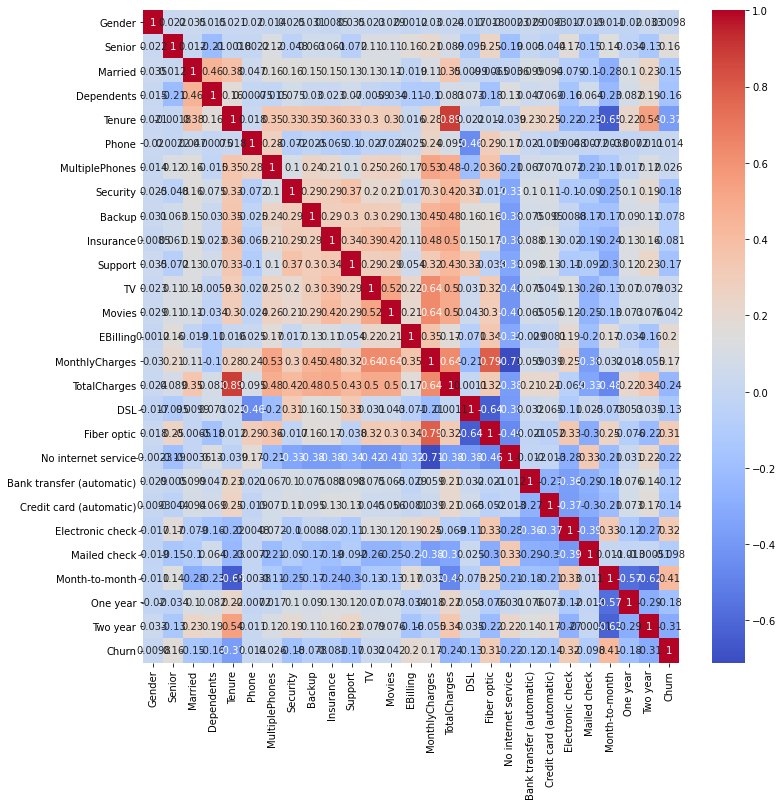

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(data[numeric_data.columns.tolist() + ['Churn']].corr(method = 'spearman'), cmap='coolwarm', annot = True)

***Методы***

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(numeric_data, 
                                                    data.Churn,
                                                    test_size = 0.2,
                                                    random_state = 1)

RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20)
rfc = rfc.fit(X_train, Y_train)

Train evaluation
              precision    recall  f1-score   support

       False       0.99      1.00      1.00      2111
        True       0.99      0.98      0.99       761

    accuracy                           0.99      2872
   macro avg       0.99      0.99      0.99      2872
weighted avg       0.99      0.99      0.99      2872



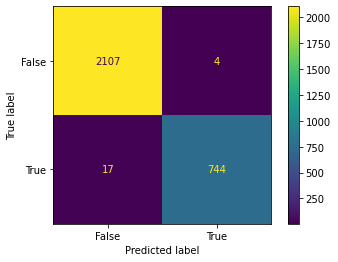

In [19]:
rfc_train_predictions = rfc.predict (X_train)

print(classification_report(Y_train, rfc_train_predictions))
plot_confusion_matrix(estimator = rfc, X=X_train, y_true=Y_train)

              precision    recall  f1-score   support

       False       0.83      0.92      0.88       528
        True       0.70      0.48      0.57       191

    accuracy                           0.81       719
   macro avg       0.76      0.70      0.72       719
weighted avg       0.80      0.81      0.79       719



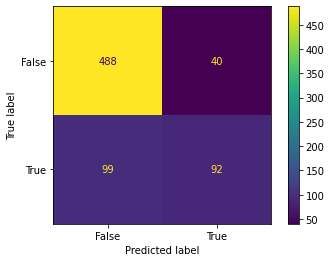

In [25]:
rfc_test_predictions = rfc.predict (X_test)

print(classification_report(Y_test, rfc_test_predictions))

plot_confusion_matrix(estimator = rfc, X= X_test, y_true=Y_test)

ADA

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)

AdaBoostClassifier()

              precision    recall  f1-score   support

       False       0.85      0.90      0.87      2111
        True       0.67      0.55      0.60       761

    accuracy                           0.81      2872
   macro avg       0.76      0.73      0.74      2872
weighted avg       0.80      0.81      0.80      2872



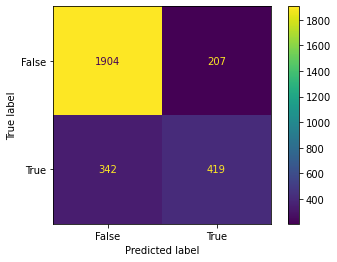

In [24]:
ada_train_predictions = ada.predict (X_train)

print(classification_report(Y_train, ada_train_predictions))
plot_confusion_matrix(estimator = ada, X=X_train, y_true=Y_train)

Test evaluation
              precision    recall  f1-score   support

       False       0.85      0.92      0.88       528
        True       0.71      0.54      0.62       191

    accuracy                           0.82       719
   macro avg       0.78      0.73      0.75       719
weighted avg       0.81      0.82      0.81       719



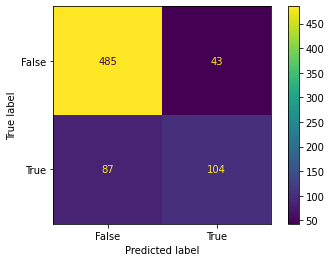

In [23]:
ada_test_predictions = ada.predict(X_test)

print('Test evaluation')
print(classification_report(Y_test, ada_test_predictions))

plot_confusion_matrix(estimator = ada, X= X_test, y_true=Y_test)

*Проведение тестов*

In [32]:
X_train = numeric_data
X_test = pd.read_csv('test.csv', index_col=0)
Y_train = data.Churn

Исправление значений

In [33]:
X_test[X_test.TotalCharges == " "]

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges
Index,,,,,,,,,,,,,,,,,,,
38,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1060,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2024,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,
2039,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,


In [34]:
X_test.TotalCharges = X_test.TotalCharges.replace(' ', 0).astype(float)

In [35]:
X_test[X_test.TotalCharges == " "]

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges
Index,,,,,,,,,,,,,,,,,,,


Замена значений

In [36]:
X_test = X_test.replace({'Gender': {'Female': 1, 'Male': 0}, 
                     'Married': {'Yes': 1, 'No': 0}, 
                     'Phone': {'Yes': 1, 'No': 0},
                     'EBilling': {'Yes': 1, 'No': 0},
                     'Security': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'Backup': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'Insurance': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'Support': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'TV': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'Movies': {'Yes': 1, 'No':0, 'No internet service': 0},
                     'Dependents': {'Yes': 1, 'No': 0},
                     
                     'MultiplePhones': {'Yes': 1, 'No': 0, 'No phone service': 0},
                     
                     'Internet': {'No': "No internet service"},
                    })

X_test = pd.concat([X_test.drop('Internet', axis=1), 
                          pd.get_dummies(X_test['Internet'])], axis = 1)
X_test = pd.concat([X_test.drop('PaymentMethod', axis=1),
                          pd.get_dummies(X_test['PaymentMethod'])], axis = 1)
X_test = pd.concat([X_test.drop('Contract', axis=1),
                          pd.get_dummies(X_test['Contract'])], axis = 1)


X_test.sample(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Security,Backup,Insurance,...,DSL,Fiber optic,No internet service,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
Index,,,,,,,,,,,,,,,,,,,,,
1069,0,0,0,0,37,1,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
672,1,0,0,0,3,1,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
1684,1,0,1,1,52,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2320,1,0,1,1,59,1,1,1,1,1,...,1,0,0,0,1,0,0,0,0,1
2252,0,0,1,0,68,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1


Выделение числовых

In [37]:
X_testnumeric_data = X_test.select_dtypes(include=np.number)
X_testnumeric_data.sample(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Security,Backup,Insurance,...,DSL,Fiber optic,No internet service,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
Index,,,,,,,,,,,,,,,,,,,,,
2154,1,0,1,0,11,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
620,1,0,0,0,26,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1125,0,0,0,0,22,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
361,0,1,0,0,71,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
980,1,0,1,1,72,1,1,1,0,1,...,1,0,0,1,0,0,0,0,0,1


*Выбор метода*

АДА

In [38]:
answ_ada = AdaBoostClassifier()
answ_ada.fit(X_train, Y_train)

AdaBoostClassifier()

Дерево

In [40]:
answ_tree = RandomForestClassifier(n_estimators=20)
answ_tree.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=20)

              precision    recall  f1-score   support

       False       0.84      0.91      0.87      2639
        True       0.68      0.52      0.59       952

    accuracy                           0.81      3591
   macro avg       0.76      0.71      0.73      3591
weighted avg       0.80      0.81      0.80      3591



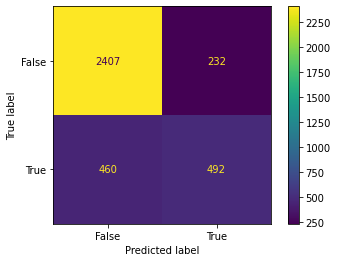

In [41]:
answ_ada_train_pred = answ_ada.predict(X_train)

print(classification_report(Y_train, answ_ada_train_pred))
plot_confusion_matrix(estimator = answ_ada, X=X_train, y_true=Y_train)

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2639
        True       1.00      0.97      0.99       952

    accuracy                           0.99      3591
   macro avg       0.99      0.99      0.99      3591
weighted avg       0.99      0.99      0.99      3591



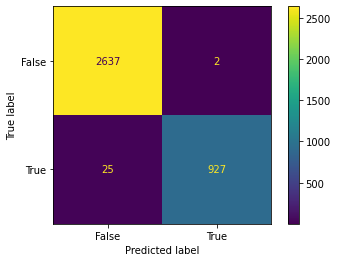

In [42]:
answ_tree_train_pred = answ_tree.predict(X_train)

print(classification_report(Y_train, answ_tree_train_pred))
plot_confusion_matrix(estimator = answ_tree, X=X_train, y_true=Y_train)

Получение тестовых предсказаний

In [45]:
answ_ada_test_pred = answ_ada.predict(X_test)
answ_ada_test_pred

array([False,  True, False, ...,  True,  True, False])

In [48]:
answ_tree_test_pred = answ_tree.predict(X_test)
answ_tree_test_pred

array([False, False, False, ...,  True,  True,  True])

Вывод значений

In [53]:
path_tree = 'result_ada.csv'
pd_arr = pd.DataFrame(answ_ada_test_pred)
pd_arr.to_csv(path_tree)

In [54]:
path_ada = 'result_tree.csv'
pd_arr = pd.DataFrame(answ_tree_test_pred)
pd_arr.to_csv(path_ada)

In [55]:
pd.read_csv(path_ada, index_col=0)

,0
0,False
1,False
2,False
3,False
4,True
...,...
2390,False
2391,False
2392,True
2393,True


In [56]:
pd.read_csv(path_tree, index_col=0)

,0
0,False
1,True
2,False
3,False
4,True
...,...
2390,False
2391,False
2392,True
2393,True
